In [10]:
# Import pandas, numpy, and matplotlib
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# Import for splitting data into train & test for the ML models
from sklearn.model_selection import train_test_split

# Import Machine Learning Linear regression models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score

# Import GB
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Import standard scaler for scaling the data
from sklearn.preprocessing import StandardScaler

# Import metrics to calculate accuracy of models
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
# Read the cleaned country data CSV file
df = pd.read_csv("../Resources/merged_df.csv", encoding ="unicode_escape")
world_df = df.copy()
world_df.head()

,country_name,Year,urbanization,gdp_per_cap,inflation,gdp_current,unemployment,literacy_adult,health_exp,literacy_youth,life_exp,re_consumption,ff_consumption,energy_use
0,Canada,1971,76.090,4520.162878,2.704918,9.927196e+10,6.400000,81.228489,6.204456,88.205112,73.029268,30.497158,84.154154,6436.226256
1,Afghanistan,1971,12.021,166.224831,25.565204,1.831109e+09,8.118803,81.228489,6.204456,88.205112,37.923000,30.497158,65.539705,2326.432009
2,Albania,1971,31.933,10212.316586,25.565204,2.063322e+11,8.118803,81.228489,6.204456,88.205112,65.618000,30.497158,74.660703,785.161526
3,Algeria,1971,39.665,359.824582,2.626642,5.077222e+09,8.118803,81.228489,6.204456,88.205112,43.670000,30.497158,98.999816,245.527602
4,American Samoa,1971,70.784,10212.316586,25.565204,2.063322e+11,8.118803,81.228489,6.204456,88.205112,66.294149,30.497158,65.539705,2326.432009


### Figuring out best hyper parameters

In [3]:
# Setting features dataframe and target vector
X = world_df.drop(["gdp_current", "country_name", "Year", "gdp_per_cap"], axis=1)
y = world_df["gdp_current"]

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.01],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5],
    'subsample': [0.8, 1.0]
}

# Create a Gradient Boosting Regression model
gbr = GradientBoostingRegressor()

# Create a GridSearchCV object with the specified hyperparameters and 5-fold cross-validation
grid_search = GridSearchCV(gbr, param_grid, cv=5, scoring='r2')

# Split the data into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [4]:
# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding r2 score
best_params = grid_search.best_params_
best_r2 = grid_search.best_score_

# Train a new model with the best hyperparameters
best_gbr = GradientBoostingRegressor(**best_params)
best_gbr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_gbr.predict(X_test)

In [5]:
# Evaluate the accuracy of the model using r2_score
r2 = r2_score(y_test, y_pred)
print("Best hyperparameters:", best_params)
print("Best r2 score:", best_r2)
print("Test r2 score:", r2)

Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 7, 'min_samples_split': 5, 'n_estimators': 300, 'subsample': 0.8}
Best r2 score: 0.6458453887127432
Test r2 score: 0.7366985958925526


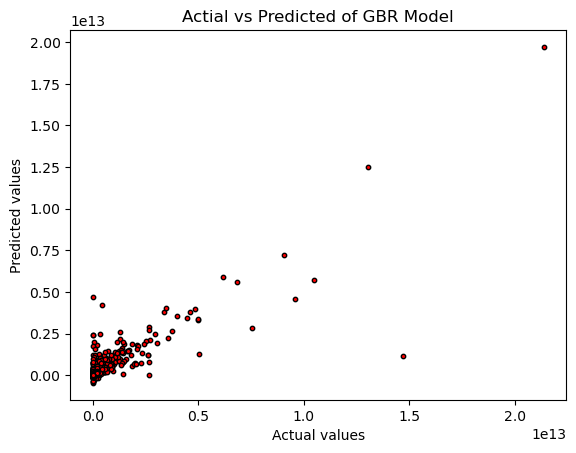

In [18]:
plt.scatter(y_test,y_pred, s=10, c='red', edgecolor='black',)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actial vs Predicted of GBR Model')
plt.show()

### Gradient Boosting Model

In [30]:
# Setting features dataframe and target vector
X = world_df.drop(["gdp_current", "country_name", "Year", "gdp_per_cap"], axis=1)
y = world_df["gdp_current"]

# Split the data into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train and fit the model with the best hyperparameters
best_gbr = GradientBoostingRegressor(learning_rate= 0.1, max_depth= 7, min_samples_split= 5, n_estimators= 300, subsample= 0.8)
best_gbr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_gbr.predict(X_test)

print("Model's Performance on Testing Data (20% of all data).\n")
print("Evaluation metrics of World's Data (1971-2021)")
print("====================")
# Evaluate the accuracy of the model using r2_score
r2 = r2_score(y_test, y_pred)
print("Test r2 score:", np.round(r2 * 100, 2))

Model's Performance on Testing Data (20% of all data).

Evaluation metrics of World's Data (1971-2021)
Test r2 score: 82.02


In [31]:
# Setting features dataframe and target vector
X = world_df.drop(["gdp_current", "country_name", "Year", "gdp_per_cap"], axis=1)
y = world_df["gdp_current"]

# Split the data into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train and fit the model with the best hyperparameters
best_gbr = GradientBoostingRegressor(learning_rate= 0.1, max_depth= 7, min_samples_split= 5, n_estimators= 300, subsample= 0.8)
best_gbr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_gbr.predict(X_test)

print("Model's Performance on Testing Data (20% of all data).\n")
print("Evaluation metrics of World's Data (1971-2021)")
print("====================")
# Evaluate the accuracy of the model using r2_score
r2 = r2_score(y_test, y_pred)
print("Test r2 score:", np.round(r2 * 100, 2))

Model's Performance on Testing Data (20% of all data).

Evaluation metrics of World's Data (1971-2021)
Test r2 score: 77.29


In [32]:
# Setting features dataframe and target vector
X = world_df.drop(["gdp_current", "country_name", "Year", "gdp_per_cap"], axis=1)
y = world_df["gdp_current"]

# Split the data into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train and fit the model with the best hyperparameters
best_gbr = GradientBoostingRegressor(learning_rate= 0.1, max_depth= 7, min_samples_split= 5, n_estimators= 300, subsample= 0.8)
best_gbr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_gbr.predict(X_test)

print("Model's Performance on Testing Data (20% of all data).\n")
print("Evaluation metrics of World's Data (1971-2021)")
print("====================")
# Evaluate the accuracy of the model using r2_score
r2 = r2_score(y_test, y_pred)
print("Test r2 score:", np.round(r2 * 100, 2))

Model's Performance on Testing Data (20% of all data).

Evaluation metrics of World's Data (1971-2021)
Test r2 score: 86.12


In [36]:
# Setting features dataframe and target vector
X = world_df.drop(["gdp_current", "country_name", "Year", "gdp_per_cap"], axis=1)
y = world_df["gdp_current"]

# Split the data into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train and fit the model with the best hyperparameters
best_gbr = GradientBoostingRegressor(learning_rate= 0.1, max_depth= 7, min_samples_split= 5, n_estimators= 300, subsample= 0.8)
best_gbr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_gbr.predict(X_test)

print("Model's Performance on Testing Data (20% of all data).\n")
print("Evaluation metrics of World's Data (1971-2021)")
print("====================")
# Evaluate the accuracy of the model using r2_score
r2 = r2_score(y_test, y_pred)
print("Test r2 score:", np.round(r2 * 100, 2))

Model's Performance on Testing Data (20% of all data).

Evaluation metrics of World's Data (1971-2021)
Test r2 score: 81.12


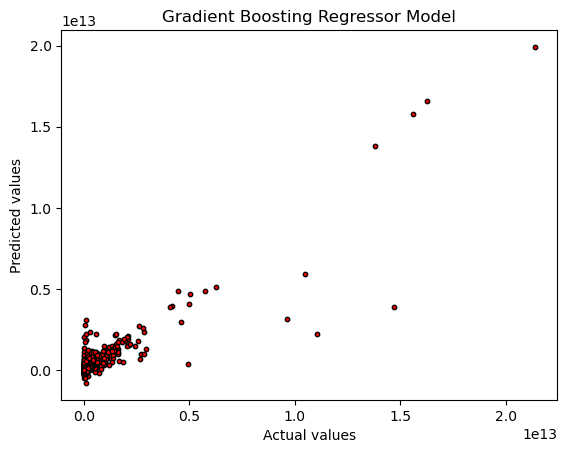

In [37]:
plt.scatter(y_test,y_pred, s=10, c='red', edgecolor='black',)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Gradient Boosting Regressor Model')
plt.show()

In [38]:
# Make predictions on the training data - to check if there's overfitting
y_pred = best_gbr.predict(X_train)

print("Model's Performance on Training Data (80% of all data).\n")
print("Evaluation metrics of World's Data (1971-2021)")
print("====================")
# Calculate the accuracy of the GBF model
score = best_gbr.score(X_train, y_train)
print(f"Test accuracy: {np.round(score * 100, 2)}%")

# Calculate the r2_score of GBF model
r2_score_ = r2_score(y_train,y_pred)
print(f"R2 Score: {np.round(r2_score_ * 100, 2)}%")

Model's Performance on Training Data (80% of all data).

Evaluation metrics of World's Data (1971-2021)
Test accuracy: 99.71%
R2 Score: 99.71%


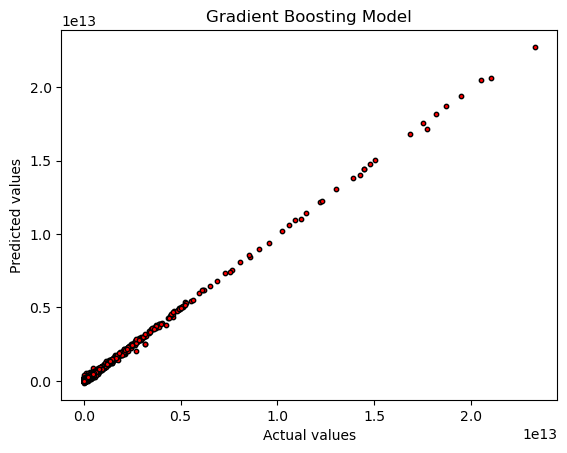

In [40]:
plt.scatter(y_train,y_pred, s=10, c='red', edgecolor='black',)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Gradient Boosting Model')
plt.show()